# Using Randforest with SciKit Learn to predict birth time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#dataframe
dataframe=pd.read_csv('labourward.csv')
dataframe.head()

,systolic,diastolic,BMI,time,RAWWeight,momWeight/10,timeConv,time24HRS,timeValueinHrs
0,122.0,92.0,19.7,9:30am,75kgs,7.50,9:30 AM,09:30,9.50
1,110.0,80.0,18.5,10:20am,60kgs,6.00,10:20 AM,10:20,10.33
2,122.0,76.0,20.1,8:20pm,77kgs,7.70,8:20 PM,20:20,20.33
3,126.0,94.0,22.3,3:15pm,76.5kgs,7.65,3:15 PM,15:15,15.25
4,124.0,86.0,20.2,12:10pm,62.4kgs,6.24,12:10 PM,12:10,12.17


In [3]:
#dataset shape
dataset=np.array(dataframe)
print(dataset.shape)

(101, 9)


In [6]:
#x=np.array(dataframe['momWeight/10']).reshape(-1,1)
#or
x=dataset[:,5].reshape(-1,1)
print(x)

[[7.5]
 [6.0]
 [7.7]
 [7.65]
 [6.24]
 [7.0]
 [8.5]
 [7.1]
 [6.8]
 [7.07]
 [6.97]
 [5.59]
 [6.32]
 [6.5]
 [7.0]
 [8.3]
 [5.8]
 [8.2]
 [6.3]
 [7.2]
 [5.8]
 [6.8]
 [6.1]
 [7.3]
 [8.2]
 [5.7]
 [7.65]
 [6.24]
 [7.0]
 [8.5]
 [7.1]
 [6.8]
 [7.07]
 [6.97]
 [5.59]
 [6.32]
 [6.5]
 [7.0]
 [8.3]
 [7.5]
 [7.5]
 [6.0]
 [7.7]
 [7.65]
 [6.24]
 [7.0]
 [8.5]
 [7.1]
 [6.8]
 [7.07]
 [6.97]
 [5.59]
 [6.32]
 [6.5]
 [7.0]
 [8.3]
 [5.8]
 [8.2]
 [6.3]
 [7.2]
 [5.8]
 [6.8]
 [6.1]
 [7.3]
 [8.2]
 [5.7]
 [7.65]
 [6.24]
 [7.0]
 [8.5]
 [7.1]
 [6.8]
 [7.07]
 [6.97]
 [5.59]
 [6.32]
 [6.5]
 [7.0]
 [8.3]
 [7.5]
 [7.07]
 [6.97]
 [5.59]
 [6.32]
 [6.5]
 [7.0]
 [8.3]
 [5.8]
 [8.2]
 [6.3]
 [7.2]
 [5.8]
 [6.8]
 [7.65]
 [6.24]
 [7.0]
 [8.5]
 [7.1]
 [6.8]
 [7.07]
 [6.97]]


In [7]:
y=dataset[:,8] #1 D column expected
print(y)

[9.5 10.33 20.33 15.25 12.17 11.08 8.5 6.02 9.33 9.5 10.33 20.33 15.25
 12.17 11.08 8.5 6.02 9.33 11.23 9.07 6.33 9.22 12.38 15.5 16.5 12.38 9.35
 22.38 23.35 9.6 6.22 12.25 11.07 12.27 7.25 9.68 15.33 20.43 22.07 22.38
 23.35 9.6 6.22 12.25 11.07 12.27 7.25 9.68 15.33 20.43 22.07 15.5 16.5
 12.38 9.35 22.38 23.35 9.6 6.22 12.25 11.07 12.27 7.25 9.68 3.35 20.22
 11.23 9.07 6.33 9.22 12.38 15.5 16.5 12.38 9.35 22.38 23.35 9.6 6.22 17.5
 0.27 3.35 20.22 11.23 9.07 6.33 9.22 12.38 15.5 16.5 12.38 9.35 22.38
 23.35 21.27 10.37 9.25 16.27 9.38 22.27 6.02]


In [8]:
#divide into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100)

In [9]:
#check shapes
print(f"x_train length: {len(x_train)}\nx_test length: {len(x_test)}\ny_train length: {len(y_train)}\ny_test length: {len(y_test)}")

x_train length: 75
x_test length: 26
y_train length: 75
y_test length: 26


In [10]:
#using random forest regression model
from sklearn.ensemble import RandomForestRegressor

#create a regression object
regressor= RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [11]:
import math

In [12]:
y_hat=regressor.predict(x_test)
for i in range(len(x_test)):
    res=y_hat[i]
    m=(round((res-int(res))*60,0))/100
    h=math.trunc(res)
    time=m+h
    if time>0.0 and time<12.0:
     
     print(f"Weight {x_test[i]*10} kg = Prediction: {time:0.2f} am")
    elif time>11.59 and time<23.59:
        time=round(time-12.00,2)#convert into 12hrs clock
        if time>=0.0 and time<=0.59:
         print(f"Weight {x_test[i]*10} kg = Prediction: {time+12.00:0.2f} pm")
        elif time>0.59:
         print(f"Weight {x_test[i]*10} kg = Prediction: {time:0.2f} pm")
    

Weight [70.0] kg = Prediction: 9.20 am
Weight [83.0] kg = Prediction: 5.49 pm
Weight [76.5] kg = Prediction: 1.29 pm
Weight [76.5] kg = Prediction: 1.29 pm
Weight [63.2] kg = Prediction: 3.05 pm
Weight [57.0] kg = Prediction: 4.21 pm
Weight [65.0] kg = Prediction: 3.42 pm
Weight [69.7] kg = Prediction: 9.49 am
Weight [83.0] kg = Prediction: 5.49 pm
Weight [68.0] kg = Prediction: 1.47 pm
Weight [63.2] kg = Prediction: 3.05 pm
Weight [55.9] kg = Prediction: 12.10 pm
Weight [82.0] kg = Prediction: 11.32 am
Weight [58.0] kg = Prediction: 11.23 am
Weight [82.0] kg = Prediction: 11.32 am
Weight [85.0] kg = Prediction: 8.37 am
Weight [69.7] kg = Prediction: 9.49 am
Weight [70.0] kg = Prediction: 9.20 am
Weight [60.0] kg = Prediction: 10.00 am
Weight [55.9] kg = Prediction: 12.10 pm
Weight [85.0] kg = Prediction: 8.37 am
Weight [65.0] kg = Prediction: 3.42 pm
Weight [63.2] kg = Prediction: 3.05 pm
Weight [76.5] kg = Prediction: 1.29 pm
Weight [70.0] kg = Prediction: 9.20 am
Weight [61.0] kg = 

# Model Evalutaion

In [19]:
#get the mean squared error root
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"MSE root: {np.sqrt(mean_squared_error(y_test,y_hat))}")
print(f"MAE root: {mean_absolute_error(y_test,y_hat)}")

MSE root: 6.249171531925838
MAE root: 5.019748367006927


# Visualization of the model

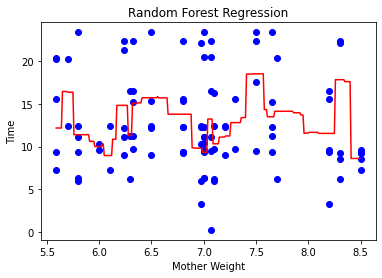

In [18]:
X_grid = np.arange(min(x), max(x), 0.01)
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'red') 
plt.title('Random Forest Regression')
plt.xlabel('Mother Weight')
plt.ylabel('Time')
plt.show()